In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import ast
from new_utils import calculate_list_cumulative_values
from new_utils import calculate_normalized_difference
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'new_combined_data.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
#print(df.head())  


In [14]:
teams = df['team_name']
print(teams.tolist())

['Atlético Madrid', 'Mallorca', 'Valencia', 'Real Sociedad', 'Almería', 'CA Osasuna', 'Girona', 'Barcelona', 'Real Betis', 'Alavés', 'Granada CF', 'Las Palmas', 'Celta Vigo', 'Cádiz CF', 'Sevilla', 'Villarreal', 'Athletic Bilbao', 'Getafe', 'Rayo Vallecano', 'Werder Bremen', 'Augsburg', 'Bayer Leverkusen', 'VfL Wolfsburg', 'TSG Hoffenheim', 'VfB Stuttgart', 'Borussia Dortmund', 'Union Berlin', 'Eintracht Frankfurt', 'RB Leipzig', 'FC Heidenheim', 'FC Koln', 'SC Freiburg', 'SV Darmstadt 98', 'Borussia Monchengladbach', 'FSV Mainz 05', 'Empoli', 'Frosinone', 'Genoa', 'Inter Milan', 'AS Roma', 'Sassuolo', 'Udinese', 'Lecce', 'Torino', 'Bologna', 'Monza', 'AC Milan', 'Hellas Verona FC', 'Juventus', 'Fiorentina', 'Lazio', 'Napoli', 'Salernitana', 'Metz', 'Lyon', 'Toulouse', 'Lille', 'Le Havre', 'Stade de Reims', 'Lorient', 'AS Monaco', 'RC Lens', 'Nottingham Forest', 'Liverpool', 'Fulham', 'Wolverhampton Wanderers', 'Tottenham Hotspur', 'Manchester City', 'Aston Villa', 'West Ham United', '

In [15]:
team_name = 'Bayern Munich'
team_row = df[df['team_name'] == team_name]
# print(len(team_row))

In [16]:
#getting dates 
from new_utils import convert_date_format

#Convert string embedded list to list
dates_string = team_row['dates'].tolist()[0]
dates = ast.literal_eval(dates_string)
converted_dates = []
for date in dates:
    converted_dates.append(convert_date_format(date))    

[1, 1, 1, 0, 1, 0, 0] [0.1111111111111111, 0.9345794392523364, 0.8, 0.6451612903225806, 0.9090909090909091, 0.5235602094240838, 0.8474576271186441]
[0.8888888888888888, 0.9543094496365525, 1.1543094496365525, 0.509148159313972, 0.6000572502230628, 0.07649704079897912, -0.7709605863196654]


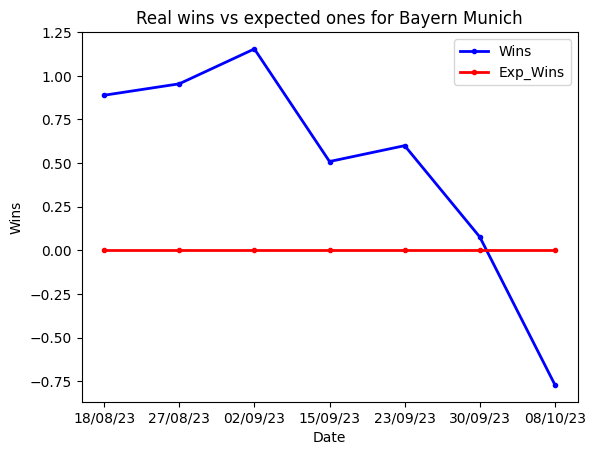

In [17]:
# Analyzing wins

#Convert string embedded list to list
wins_string = team_row['wins'].tolist()[0]
wins = ast.literal_eval(wins_string)

exp_wins_string = team_row['exp_wins'].tolist()[0]
exp_wins = ast.literal_eval(exp_wins_string)

print(wins, exp_wins)

#Cleaning of data for better visualization
cum_exp_wins = calculate_list_cumulative_values(exp_wins)
norm_wins = calculate_normalized_difference(wins, cum_exp_wins)
#exp_wins = compute_list_normalized_cumulative_values(exp_wins)

print(norm_wins)


# Create a scatter plot with connecting lines for the first set of data
plt.plot(converted_dates, norm_wins, color='blue', marker='.', linestyle='-', linewidth=2, label='Wins')

# Create a scatter plot with connecting lines for the second set of data
plt.plot(converted_dates, np.zeros(len(wins)), color='red', marker='.', linestyle='-', linewidth=2, label='Exp_Wins')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Wins')
plt.title(f'Real wins vs expected ones for {team_name}')
plt.legend()

# Show the plot
plt.show()
